In [21]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.chdir("D:\GCOEN\Data Science with Python\Excel Data Files")

In [3]:
df = pd.read_csv('mobile_price_range_data.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
df.shape

(2000, 21)

In [5]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [6]:
df['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [7]:
x = df[['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt','n_cores','pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']]
y = df['price_range']
print(type(x))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [8]:
x.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [9]:
y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
print(x.shape)
print(y.shape)

(2000, 20)
(2000,)


In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1500, 20)
(500, 20)
(1500,)
(500,)


In [13]:
x_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1600,1776,1,2.1,1,10,0,35,0.1,172,4,16,278,623,1813,16,13,20,1,1,1
342,1989,1,2.9,1,8,0,17,0.1,193,8,15,629,682,2369,7,0,18,1,1,0
954,922,1,0.7,0,0,1,47,1.0,157,8,14,1295,1808,1464,17,4,12,1,0,1
625,501,0,2.3,0,12,1,54,0.3,131,4,19,504,1089,2346,13,12,2,1,0,1
815,1512,1,0.5,0,1,0,52,0.1,131,1,14,333,952,3002,6,5,7,0,0,1


In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
m1 = LogisticRegression()
m1.fit(x_train,y_train)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
ypred_m1 = m1.predict(x_test)
print(ypred_m1)

[2 3 1 3 0 0 3 0 0 1 0 3 1 0 3 2 2 3 0 0 1 3 3 3 0 2 3 1 1 3 0 1 3 1 2 0 0
 1 0 0 1 0 1 3 3 1 1 2 0 2 0 0 3 3 0 1 1 1 3 0 3 3 1 1 3 1 0 0 2 0 1 2 0 1
 3 0 0 2 0 3 2 2 3 3 3 3 0 2 3 0 0 3 1 2 0 2 1 3 1 0 0 1 0 2 0 1 1 3 3 3 2
 2 0 1 1 2 1 3 1 3 3 3 2 0 1 2 0 0 3 0 3 1 1 0 3 2 2 1 0 0 1 2 0 0 1 3 2 1
 3 1 2 3 3 1 2 3 3 3 3 3 3 2 1 1 2 1 2 1 1 1 1 0 3 2 3 0 0 3 1 0 2 3 3 0 1
 0 3 2 3 0 0 3 1 3 0 0 3 0 2 3 1 2 3 1 2 3 0 3 3 0 3 1 3 2 2 3 0 0 3 3 1 2
 0 3 1 3 1 2 0 2 0 2 0 0 3 1 3 2 3 3 3 1 0 1 0 1 0 3 0 3 0 3 3 3 1 1 3 0 0
 2 3 3 1 2 1 3 3 1 2 0 2 3 2 2 0 2 1 3 3 1 2 2 3 2 3 1 3 1 2 1 2 1 3 1 0 2
 0 3 1 0 2 0 2 3 3 1 2 3 0 3 1 2 1 0 1 2 3 1 0 2 0 0 2 0 0 3 2 0 3 1 2 0 0
 2 2 3 1 1 3 1 0 3 1 0 3 0 0 1 1 0 2 0 3 0 0 3 0 1 2 2 3 3 2 0 1 3 0 2 2 1
 3 2 1 0 3 1 2 1 0 2 3 3 3 2 3 3 3 2 1 1 3 2 3 1 3 0 1 3 2 3 1 2 0 2 0 1 1
 0 1 3 2 2 2 3 3 1 3 3 3 1 0 1 3 1 3 3 2 0 1 1 2 2 0 3 2 1 1 0 2 1 1 2 0 3
 0 0 3 2 0 3 3 3 3 3 3 3 2 1 2 1 0 3 0 0 3 1 3 3 0 0 1 3 2 0 3 2 1 1 0 0 3
 3 1 1 0 1 3 0 0 1 3 3 3 

In [17]:
from sklearn.metrics import confusion_matrix,classification_report

In [18]:
cm = confusion_matrix(y_test,ypred_m1)
print(cm)
print(classification_report(y_test, ypred_m1))

[[ 98  22   0   0]
 [ 29  67  24  12]
 [  0  29  59  42]
 [  0   1  14 103]]
              precision    recall  f1-score   support

           0       0.77      0.82      0.79       120
           1       0.56      0.51      0.53       132
           2       0.61      0.45      0.52       130
           3       0.66      0.87      0.75       118

    accuracy                           0.65       500
   macro avg       0.65      0.66      0.65       500
weighted avg       0.65      0.65      0.64       500



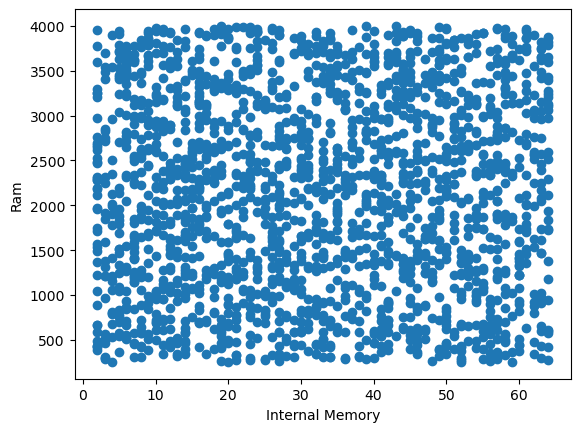

In [19]:
plt.scatter(df['int_memory'], df['ram'])
plt.xlabel('Internal Memory')
plt.ylabel('Ram')
plt.show()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


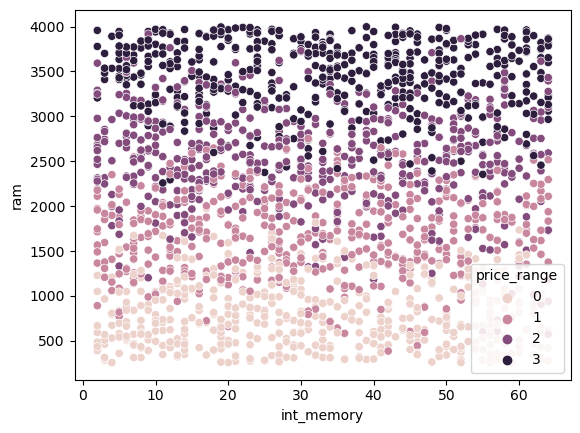

In [22]:
sns.scatterplot(df['int_memory'], df['ram'], hue=df['price_range'])
plt.show()

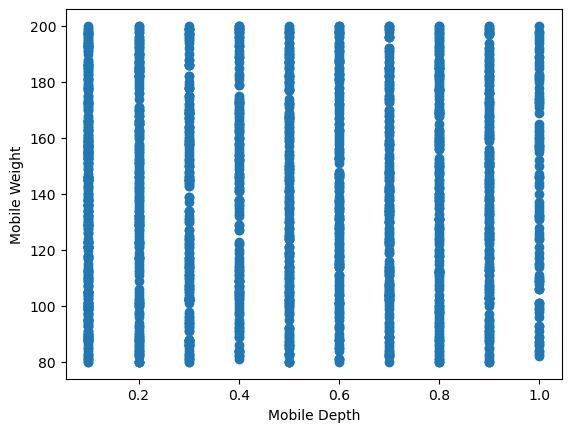

In [23]:
plt.scatter(df['m_dep'], df['mobile_wt'])
plt.xlabel('Mobile Depth')
plt.ylabel('Mobile Weight')
plt.show()

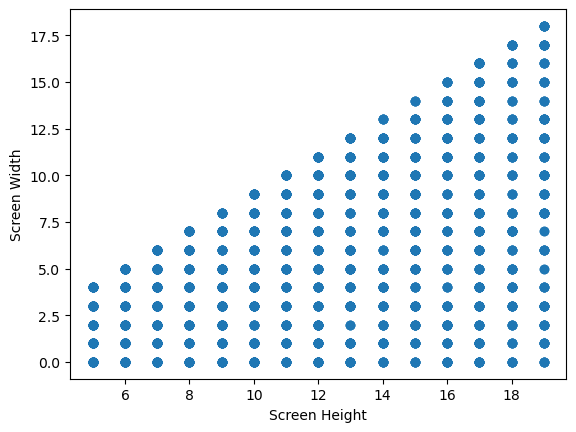

In [24]:
plt.scatter(df['sc_h'], df['sc_w'])
plt.xlabel('Screen Height')
plt.ylabel('Screen Width')
plt.show()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


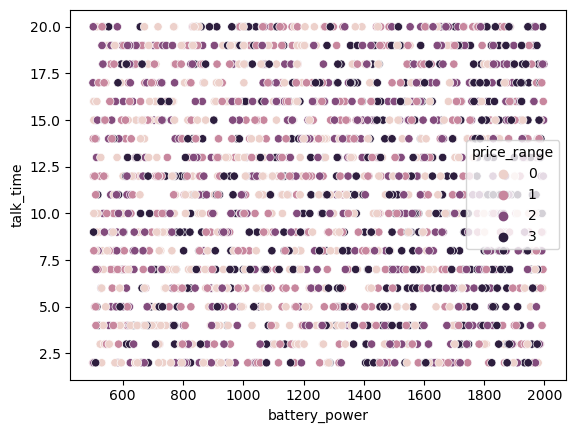

In [25]:
sns.scatterplot(df['battery_power'], df['talk_time'], hue=df['price_range'])
plt.show()

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
m2 = KNeighborsClassifier()
m2.fit(x_train, y_train)

KNeighborsClassifier()

In [29]:
### Accuracy

print("Training Score", m2.score(x_train, y_train))
print("Testing Score", m2.score(x_test, y_test))

Training Score 0.9506666666666667
Testing Score 0.922


In [30]:
y_pred = m2.predict(x_test)
print(y_pred)

[3 3 0 1 1 0 3 0 0 1 0 2 1 0 3 1 2 2 0 1 1 3 3 3 0 1 3 0 1 3 1 0 2 1 1 1 1
 1 1 0 2 1 1 3 3 0 1 2 0 1 0 0 3 3 0 1 2 1 2 0 3 3 3 2 2 2 0 1 1 0 1 2 1 2
 1 1 0 3 0 1 2 3 3 1 3 1 1 3 2 0 0 3 1 2 0 3 0 3 1 0 0 1 0 2 0 1 1 3 3 2 2
 1 1 0 1 3 1 1 2 2 1 2 1 0 2 2 1 0 3 0 2 1 0 1 3 3 2 1 0 0 0 2 1 0 2 2 2 2
 2 1 2 3 2 2 2 3 3 1 3 3 2 1 0 2 1 1 1 1 0 1 1 1 3 2 3 0 1 3 2 1 3 3 3 0 2
 0 3 2 3 0 0 3 2 3 0 0 1 0 3 3 1 3 3 0 2 1 1 3 2 0 3 0 2 3 2 3 1 0 3 2 2 1
 0 2 1 3 2 3 0 2 0 2 0 0 2 1 3 2 3 2 3 1 0 1 0 2 1 3 0 2 0 3 2 3 0 1 3 0 0
 2 3 3 1 3 1 2 3 1 2 0 2 3 2 2 0 3 1 3 3 1 1 1 3 1 1 1 3 1 2 1 2 2 3 0 0 2
 1 3 1 1 1 0 2 2 3 0 2 2 1 3 0 3 1 1 2 1 2 1 1 2 0 0 2 0 0 3 1 0 1 2 1 0 0
 3 3 3 2 1 3 1 0 3 0 1 2 0 0 2 1 0 3 0 3 0 0 3 0 2 2 2 3 3 2 0 0 2 0 2 1 1
 3 2 0 0 2 2 1 1 1 2 3 2 2 2 3 2 1 1 1 1 3 2 2 0 3 0 1 3 2 2 2 3 0 1 0 1 0
 0 1 2 1 1 1 3 3 1 2 3 3 0 1 2 3 1 3 3 2 0 1 1 2 2 0 3 2 1 1 0 2 1 1 3 0 2
 0 0 3 1 0 3 2 3 3 3 1 2 2 2 2 0 0 2 0 0 2 1 3 3 0 0 0 3 2 1 2 2 1 1 0 0 2
 3 1 1 0 0 3 0 1 1 3 3 2 

In [31]:
from sklearn.metrics import confusion_matrix,classification_report

In [32]:
cm2 = confusion_matrix(y_test, y_pred)
print(cm2)
print(classification_report(y_test, y_pred))

[[116   4   0   0]
 [  4 126   2   0]
 [  0   9 111  10]
 [  0   0  10 108]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       120
           1       0.91      0.95      0.93       132
           2       0.90      0.85      0.88       130
           3       0.92      0.92      0.92       118

    accuracy                           0.92       500
   macro avg       0.92      0.92      0.92       500
weighted avg       0.92      0.92      0.92       500



In [33]:
from sklearn.svm import SVC    

In [34]:
## Applying SVM with linear kernel

m3 = SVC(kernel='linear', C=100)
m3.fit(x_train, y_train)

SVC(C=100, kernel='linear')

In [35]:
## Accuracy

print('Training Score', m3.score(x_train, y_train))
print('Training Score', m3.score(x_test, y_test))

Training Score 0.9906666666666667
Training Score 0.978


In [36]:
ypred_m3 = m3.predict(x_test)
print('ypred\n', ypred_m1)

ypred
 [2 3 1 3 0 0 3 0 0 1 0 3 1 0 3 2 2 3 0 0 1 3 3 3 0 2 3 1 1 3 0 1 3 1 2 0 0
 1 0 0 1 0 1 3 3 1 1 2 0 2 0 0 3 3 0 1 1 1 3 0 3 3 1 1 3 1 0 0 2 0 1 2 0 1
 3 0 0 2 0 3 2 2 3 3 3 3 0 2 3 0 0 3 1 2 0 2 1 3 1 0 0 1 0 2 0 1 1 3 3 3 2
 2 0 1 1 2 1 3 1 3 3 3 2 0 1 2 0 0 3 0 3 1 1 0 3 2 2 1 0 0 1 2 0 0 1 3 2 1
 3 1 2 3 3 1 2 3 3 3 3 3 3 2 1 1 2 1 2 1 1 1 1 0 3 2 3 0 0 3 1 0 2 3 3 0 1
 0 3 2 3 0 0 3 1 3 0 0 3 0 2 3 1 2 3 1 2 3 0 3 3 0 3 1 3 2 2 3 0 0 3 3 1 2
 0 3 1 3 1 2 0 2 0 2 0 0 3 1 3 2 3 3 3 1 0 1 0 1 0 3 0 3 0 3 3 3 1 1 3 0 0
 2 3 3 1 2 1 3 3 1 2 0 2 3 2 2 0 2 1 3 3 1 2 2 3 2 3 1 3 1 2 1 2 1 3 1 0 2
 0 3 1 0 2 0 2 3 3 1 2 3 0 3 1 2 1 0 1 2 3 1 0 2 0 0 2 0 0 3 2 0 3 1 2 0 0
 2 2 3 1 1 3 1 0 3 1 0 3 0 0 1 1 0 2 0 3 0 0 3 0 1 2 2 3 3 2 0 1 3 0 2 2 1
 3 2 1 0 3 1 2 1 0 2 3 3 3 2 3 3 3 2 1 1 3 2 3 1 3 0 1 3 2 3 1 2 0 2 0 1 1
 0 1 3 2 2 2 3 3 1 3 3 3 1 0 1 3 1 3 3 2 0 1 1 2 2 0 3 2 1 1 0 2 1 1 2 0 3
 0 0 3 2 0 3 3 3 3 3 3 3 2 1 2 1 0 3 0 0 3 1 3 3 0 0 1 3 2 0 3 2 1 1 0 0 3
 3 1 1 0 1 3 0 0 1

In [37]:
from sklearn.metrics import confusion_matrix, classification_report

In [38]:
cm_m3 = confusion_matrix(y_test, ypred_m3)
print(cm_m3)
print(classification_report(y_test, ypred_m3))

[[120   0   0   0]
 [  1 128   3   0]
 [  0   2 125   3]
 [  0   0   2 116]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       120
           1       0.98      0.97      0.98       132
           2       0.96      0.96      0.96       130
           3       0.97      0.98      0.98       118

    accuracy                           0.98       500
   macro avg       0.98      0.98      0.98       500
weighted avg       0.98      0.98      0.98       500



In [39]:
### Applying SVM with RBF Kernel

m4 = SVC(kernel = 'rbf')
m4.fit(x_train, y_train)

SVC()

In [40]:
print('Training Score', m4.score(x_train, y_train))
print('Testing Score', m4.score(x_test, y_test))

Training Score 0.9533333333333334
Testing Score 0.96


In [42]:
ypred_m4 = m4.predict(x_test)
print('ypred\n', ypred_m4)

ypred
 [3 3 0 1 1 0 2 0 0 1 0 3 1 0 3 1 2 2 0 1 1 3 3 3 0 1 3 0 1 3 1 1 2 1 1 0 1
 1 0 0 2 0 1 3 3 0 1 2 0 1 0 0 3 3 0 1 2 1 3 0 3 3 3 2 2 2 0 1 1 0 1 2 1 2
 2 1 0 3 0 1 2 3 3 1 3 1 1 3 3 1 0 3 1 2 0 3 0 3 1 0 0 1 0 2 0 1 1 3 3 3 2
 1 1 0 1 3 1 1 2 3 1 2 1 0 2 2 1 0 3 0 2 1 0 1 3 3 2 1 0 0 0 2 1 0 2 2 2 2
 2 1 2 3 2 2 2 3 3 1 3 3 2 1 0 2 1 1 1 1 0 1 1 1 3 2 3 0 1 3 2 1 3 3 3 0 2
 0 3 2 2 0 0 3 2 3 0 0 1 0 3 3 1 3 3 0 2 1 1 3 2 0 3 0 3 3 2 3 1 0 3 2 2 1
 0 2 1 3 2 3 0 2 0 2 0 0 2 1 3 2 3 2 3 1 0 1 0 2 1 3 0 2 0 3 2 3 0 1 3 0 0
 2 3 3 1 3 1 1 3 1 2 0 2 3 2 2 0 3 1 3 3 1 1 2 3 1 1 1 3 1 2 1 3 2 3 0 0 2
 1 3 1 1 2 0 2 2 3 0 2 2 1 3 0 3 1 1 2 1 3 1 1 2 0 0 2 0 0 3 1 0 1 2 1 0 1
 3 2 3 2 1 3 1 0 3 0 0 2 0 0 2 1 0 3 0 3 0 0 3 0 2 2 2 3 3 2 0 1 3 0 2 1 1
 3 2 1 0 2 2 1 1 1 2 3 2 2 2 3 3 1 1 1 1 3 2 2 0 3 0 1 3 2 2 2 3 0 1 0 1 0
 0 2 2 1 1 2 3 3 1 2 3 3 0 1 2 3 1 3 3 2 0 1 1 2 2 0 3 2 1 1 0 1 1 1 2 0 2
 0 0 3 1 0 3 2 3 3 3 1 2 2 1 2 0 0 2 0 0 3 1 3 3 0 0 0 3 2 1 2 2 1 1 0 0 2
 3 1 1 0 0 3 0 1 1

In [43]:
cm_m4 = confusion_matrix(y_test, ypred_m4)
print(cm_m4)
print(classification_report(y_test, ypred_m4))

[[117   3   0   0]
 [  2 129   1   0]
 [  0   5 117   8]
 [  0   0   1 117]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       120
           1       0.94      0.98      0.96       132
           2       0.98      0.90      0.94       130
           3       0.94      0.99      0.96       118

    accuracy                           0.96       500
   macro avg       0.96      0.96      0.96       500
weighted avg       0.96      0.96      0.96       500



Here, as we can see the accuracy for SVM model are somewhat as follows :

(1) SVM with Linear kernel - Accuracy = 98 per cent 
(2) SVM with Rbf kernel - Accuracy = 97 per cent
So, it turns out that SVM model with Linear Kernel and SVM model with Rbf kernel are suitable for the given dataset.